
<center><h1>Refurbished Cars Price Prediction</h1></center>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv(r"C:\Users\hrush\Downloads\Data_Train.csv")
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


# Checking how many unique cars are there

In [3]:
uniqueCars = data.Name.unique()

In [4]:
plt.rcParams["figure.figsize"] = [20,8]


In [5]:
uniqueCars.size

1876

In [6]:
# checking null values

data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

# Filled all null values of seats with number 4

In [7]:
data["Seats"].fillna(4, inplace = True)

# Checking null columns 

In [8]:
data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                 0
Price                 0
dtype: int64

# Removing CC from Engine column

In [9]:
data['Engine'] = data['Engine'].fillna('1197 CC')
cleanEngine = (data.Engine.str.split(' ').str[0]) 

In [10]:
cleanEngine

0        998
1       1582
2       1199
3       1248
4       1968
        ... 
6014    1248
6015    1120
6016    2498
6017     998
6018     936
Name: Engine, Length: 6019, dtype: object

# Adding a clean engine column in the dataset

In [11]:
data['cleanEngine'] = cleanEngine

In [12]:
data.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,cleanEngine
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,998
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,1582
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,1199
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,1248
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,1968


# Removing bhp from Power column

In [13]:
data['Power'] = data['Power'].fillna('74 bhp')

data['Power']=data['Power'].replace("null","74 bhp")
cleanPower = (data.Power.str.split(' ').str[0])

In [14]:
cleanPower

0       58.16
1       126.2
2        88.7
3       88.76
4       140.8
        ...  
6014       74
6015       71
6016      112
6017     67.1
6018     57.6
Name: Power, Length: 6019, dtype: object

# Adding a clean power column in the dataset

In [15]:
data['cleanPower'] = cleanPower 

In [16]:
data.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,cleanEngine,cleanPower
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,998,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,1582,126.2
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,1199,88.7
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,1248,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,1968,140.8


# Removing km/kg or kmpl from mileage column

In [17]:
data['Mileage'] = data['Mileage'].fillna('17.0 kmpl')

data['Mileage'] = data['Mileage'].replace("0.0 kmpl", "17.0 kmpl")
cleanMileage = (data.Mileage.str.split(' ').str[0])

In [18]:
cleanMileage

0        26.6
1       19.67
2        18.2
3       20.77
4        15.2
        ...  
6014     28.4
6015     24.4
6016     14.0
6017     18.9
6018    25.44
Name: Mileage, Length: 6019, dtype: object

# Adding a clean power mileage in the dataset

In [19]:
data['cleanMileage'] = cleanMileage 

In [20]:
data.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,cleanEngine,cleanPower,cleanMileage
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,998,58.16,26.6
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,1582,126.2,19.67
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,1199,88.7,18.2
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,1248,88.76,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,1968,140.8,15.2


# Checking data type of all columns

In [21]:
data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
cleanEngine           object
cleanPower            object
cleanMileage          object
dtype: object

# Changing data type of cleanMileage and cleanEngine column from object to    numeric

In [22]:
data["cleanMileage"] = pd.to_numeric(data["cleanMileage"])

data["cleanEngine"] = pd.to_numeric(data["cleanEngine"])

In [23]:
data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
cleanEngine            int64
cleanPower            object
cleanMileage         float64
dtype: object

# Replacing "null" values in Power column with 0.0

In [24]:
data["cleanPower"].replace({"null": "0.0",}, inplace=True)

# Changing data type of cleanPower column from object to numeric

In [25]:
data["cleanPower"] = pd.to_numeric(data["cleanPower"])

In [26]:
data.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,cleanEngine,cleanPower,cleanMileage
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,998,58.16,26.60
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,1582,126.20,19.67
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,1199,88.70,18.20
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,1248,88.76,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,1968,140.80,15.20
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35,814,55.20,21.10
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50,1461,63.10,23.08
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50,2755,171.50,11.36
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.20,1598,103.60,20.54
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,1.95,1248,74.00,22.30


# Getting average value of each column

In [27]:
data.mean(axis=0)

Year                  2013.358199
Kilometers_Driven    58738.380296
Seats                    5.269812
Price                    9.479468
cleanEngine           1618.738827
cleanPower             111.004971
cleanMileage            18.326642
dtype: float64

# Calculating number of null values in each column

In [28]:
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
cleanEngine          0
cleanPower           0
cleanMileage         0
dtype: int64

# Filling null values of cleanEngine column

In [29]:
data["cleanEngine"].fillna(1621.276, inplace = True)

# Filling null values of cleanMileage column

In [30]:
data["cleanMileage"].fillna(18.134, inplace = True)

# Filling null or zero values of cleanPower column

In [31]:
data["cleanPower"].replace({0.0: 111.227,}, inplace=True)

In [32]:
data["cleanPower"].fillna(111.227, inplace = True)

# Again checking number of null value in each column

In [33]:
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
cleanEngine          0
cleanPower           0
cleanMileage         0
dtype: int64

# Cleaning name of cars


# 1. By car company

In [34]:
carCompany = (data.Name.str.split(' ').str[0])

# Adding Car Company column in the dataset

In [35]:

data['carCompany'] = carCompany 

# Checking unique car companys in the dataset

In [36]:
uniqueCarCompany = data.carCompany.unique()

In [37]:
uniqueCarCompany.size

31

In [38]:
data.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,cleanEngine,cleanPower,cleanMileage,carCompany
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,998,58.16,26.60,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,1582,126.20,19.67,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,1199,88.70,18.20,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,1248,88.76,20.77,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,1968,140.80,15.20,Audi
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35,814,55.20,21.10,Hyundai
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50,1461,63.10,23.08,Nissan
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50,2755,171.50,11.36,Toyota
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.20,1598,103.60,20.54,Volkswagen
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,1.95,1248,74.00,22.30,Tata


# 2. By car model

In [39]:
carModel = (data.Name.str.split(' ').str[1:])

In [40]:
carModel

0                   [Wagon, R, LXI, CNG]
1         [Creta, 1.6, CRDi, SX, Option]
2                              [Jazz, V]
3                          [Ertiga, VDI]
4       [A4, New, 2.0, TDI, Multitronic]
                      ...               
6014                        [Swift, VDI]
6015               [Xcent, 1.1, CRDi, S]
6016                    [Xylo, D4, BSIV]
6017                     [Wagon, R, VXI]
6018                      [Beat, Diesel]
Name: Name, Length: 6019, dtype: object

# Combining elements of each list to form the meaningful car model name

In [41]:
Model = []

for items in carModel:
    tempstr = ""
    for i in range(0,len(items)):
        if(i == 0):
                   tempstr = tempstr + items[i]
        else:
                   tempstr = tempstr + " " + items[i]
        
    Model.append(tempstr)
        

In [42]:
Model

['Wagon R LXI CNG',
 'Creta 1.6 CRDi SX Option',
 'Jazz V',
 'Ertiga VDI',
 'A4 New 2.0 TDI Multitronic',
 'EON LPG Era Plus Option',
 'Micra Diesel XV',
 'Innova Crysta 2.8 GX AT 8S',
 'Vento Diesel Comfortline',
 'Indica Vista Quadrajet LS',
 'Ciaz Zeta',
 'City 1.5 V AT Sunroof',
 'Swift VDI BSIV',
 'Rover Range Rover 2.2L Pure',
 'Rover Freelander 2 TD4 SE',
 'Pajero Sport 4X4',
 'Amaze S i-Dtech',
 'Swift DDiS VDI',
 'Duster 85PS Diesel RxL Plus',
 'New C-Class C 220 CDI BE Avantgare',
 '3 Series 320d',
 'S Cross DDiS 200 Alpha',
 'A6 2011-2015 35 TFSI Technology',
 'i20 1.2 Magna',
 'Vento Petrol Highline AT',
 'City Corporate Edition',
 'Micra Diesel XV',
 'Alto K10 2010-2014 VXI',
 'WRV i-VTEC VX',
 'Innova 2.5 V Diesel 7-seater',
 'Duster 110PS Diesel RxZ Pack',
 'Corolla Altis G',
 'Ssangyong Rexton RX7',
 'A6 2.7 TDI',
 'Vento 1.6 Highline',
 'Wagon R LXI BSIII',
 'Vitara Brezza ZDi Plus',
 'KUV 100 mFALCON G80 K6 5str AW',
 'M-Class ML 350 CDI',
 'Polo Diesel Trendline 1.2L

# Entering car model name in dataset

In [43]:
data['Model'] = Model

In [44]:
data.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,cleanEngine,cleanPower,cleanMileage,carCompany,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,998,58.16,26.60,Maruti,Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,1582,126.20,19.67,Hyundai,Creta 1.6 CRDi SX Option
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,1199,88.70,18.20,Honda,Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,1248,88.76,20.77,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,1968,140.80,15.20,Audi,A4 New 2.0 TDI Multitronic
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35,814,55.20,21.10,Hyundai,EON LPG Era Plus Option
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50,1461,63.10,23.08,Nissan,Micra Diesel XV
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50,2755,171.50,11.36,Toyota,Innova Crysta 2.8 GX AT 8S
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.20,1598,103.60,20.54,Volkswagen,Vento Diesel Comfortline
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,1.95,1248,74.00,22.30,Tata,Indica Vista Quadrajet LS


# Dropping multiple useless columns like name, mileage, power and engine

In [45]:
data=data.drop(['Name', 'Mileage', 'Engine', 'Power','Model'], axis = 1)
data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,cleanEngine,cleanPower,cleanMileage,carCompany
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,998,58.16,26.60,Maruti
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,1582,126.20,19.67,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,1199,88.70,18.20,Honda
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,1248,88.76,20.77,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,1968,140.80,15.20,Audi


# Checking number of unique Locations

In [46]:
uniqueLocations = data.Location.unique()

In [47]:
uniqueLocations.size

11

# Exploratory Data Analysis

In [48]:
plt.rcParams["figure.figsize"] = [30,10]

# 1. Which car company produces maximum cars

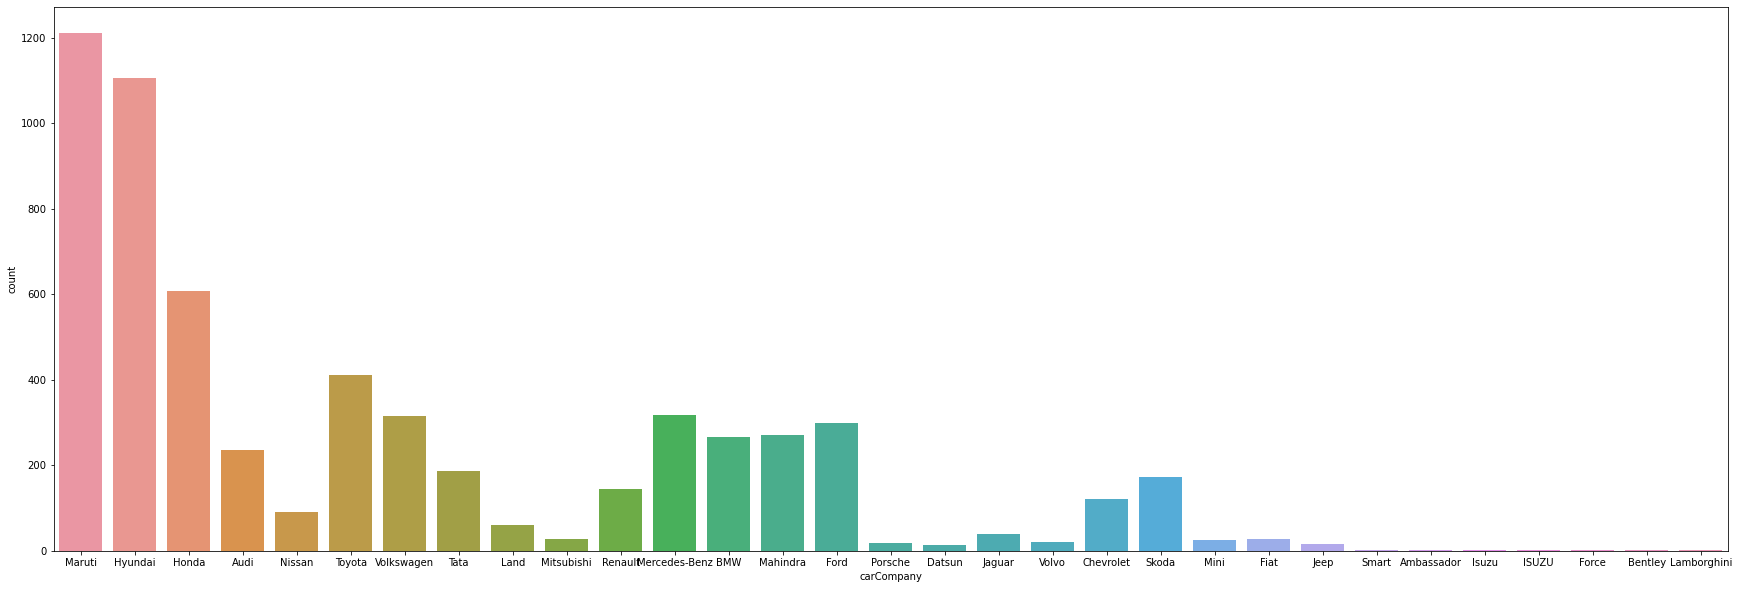

In [49]:
sns.countplot(x = "carCompany" , data = data)

# 2. Which location gives maximum price of cars

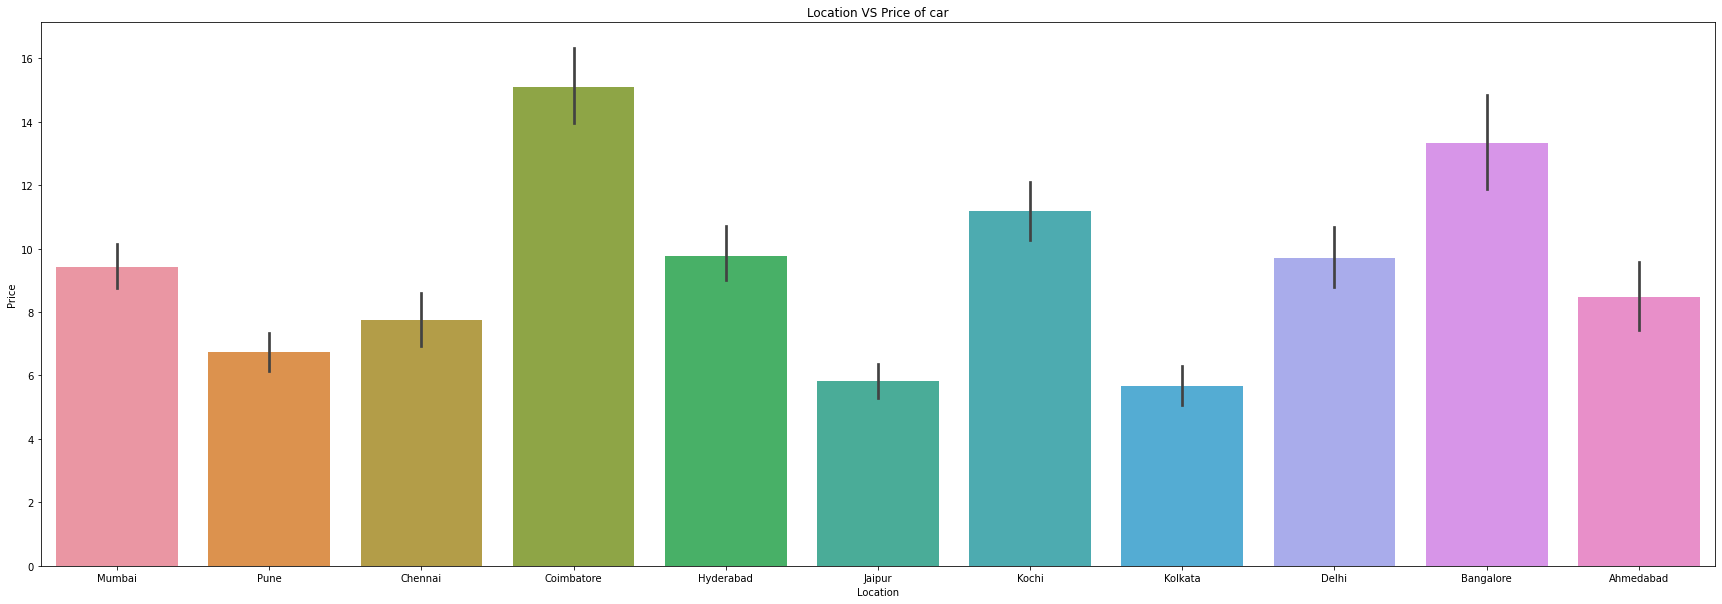

In [50]:
plt.title('Location VS Price of car')
sns.barplot(data['Location'], data['Price'])

# 3. Price of cars according to owner type

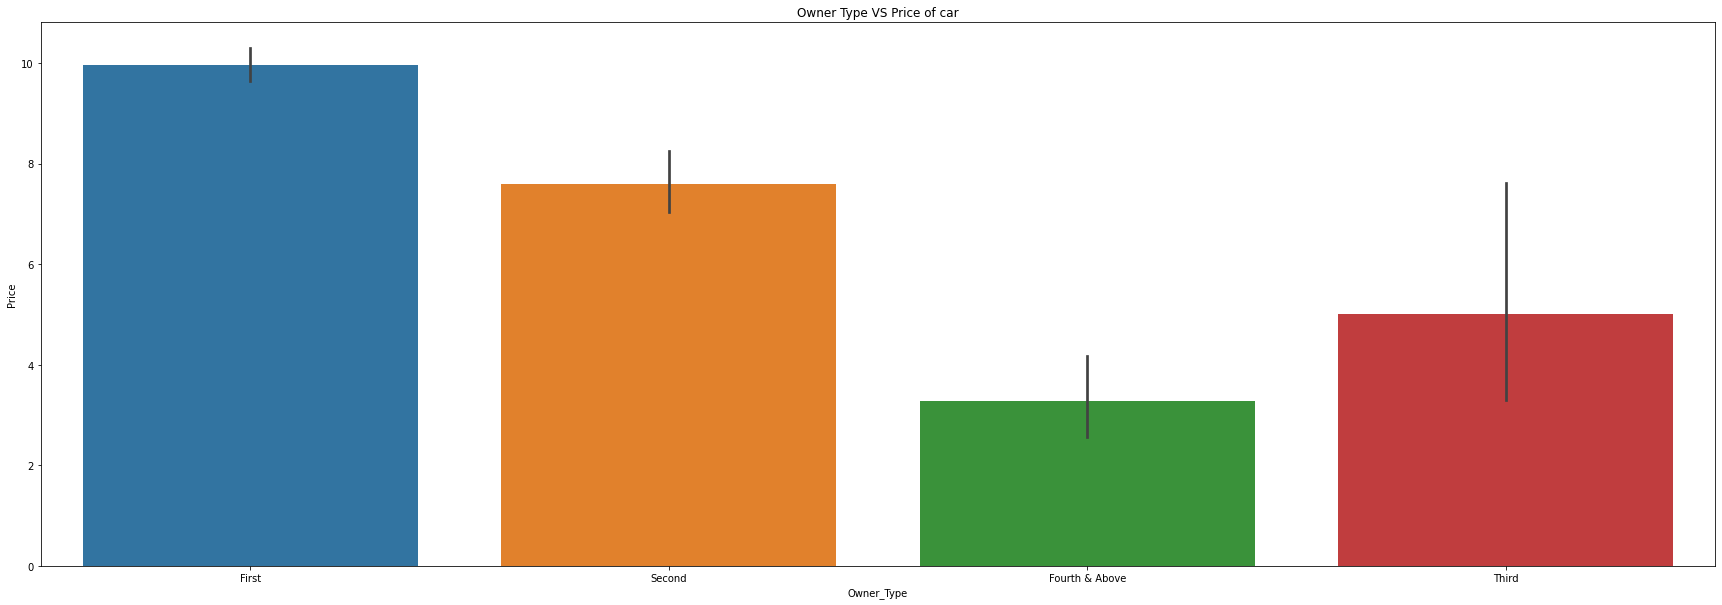

In [51]:
plt.title('Owner Type VS Price of car')
sns.barplot(data['Owner_Type'], data['Price'])

# 4. Location wise distribution of owner_type of cars

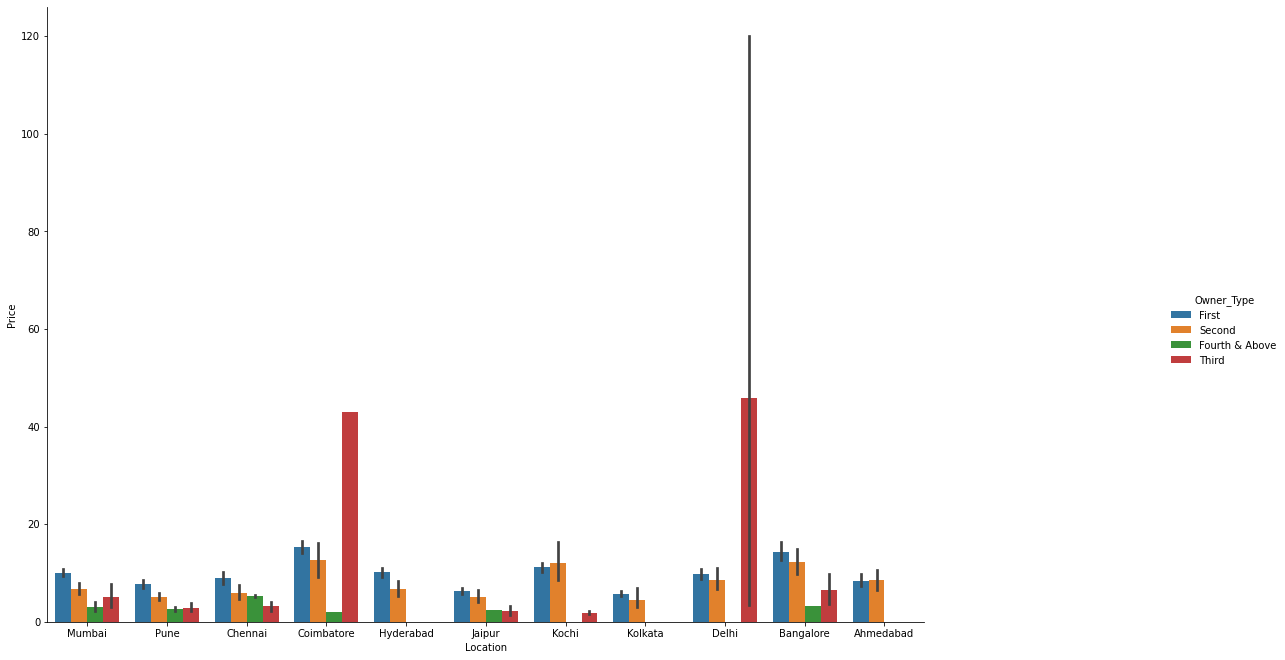

In [52]:
g = sns.catplot(x="Location", y="Price", hue="Owner_Type", data=data,kind="bar")
g.fig.set_figwidth(20)
g.fig.set_figheight(10)

# 5. Car Company wise distribution of owner type of cars

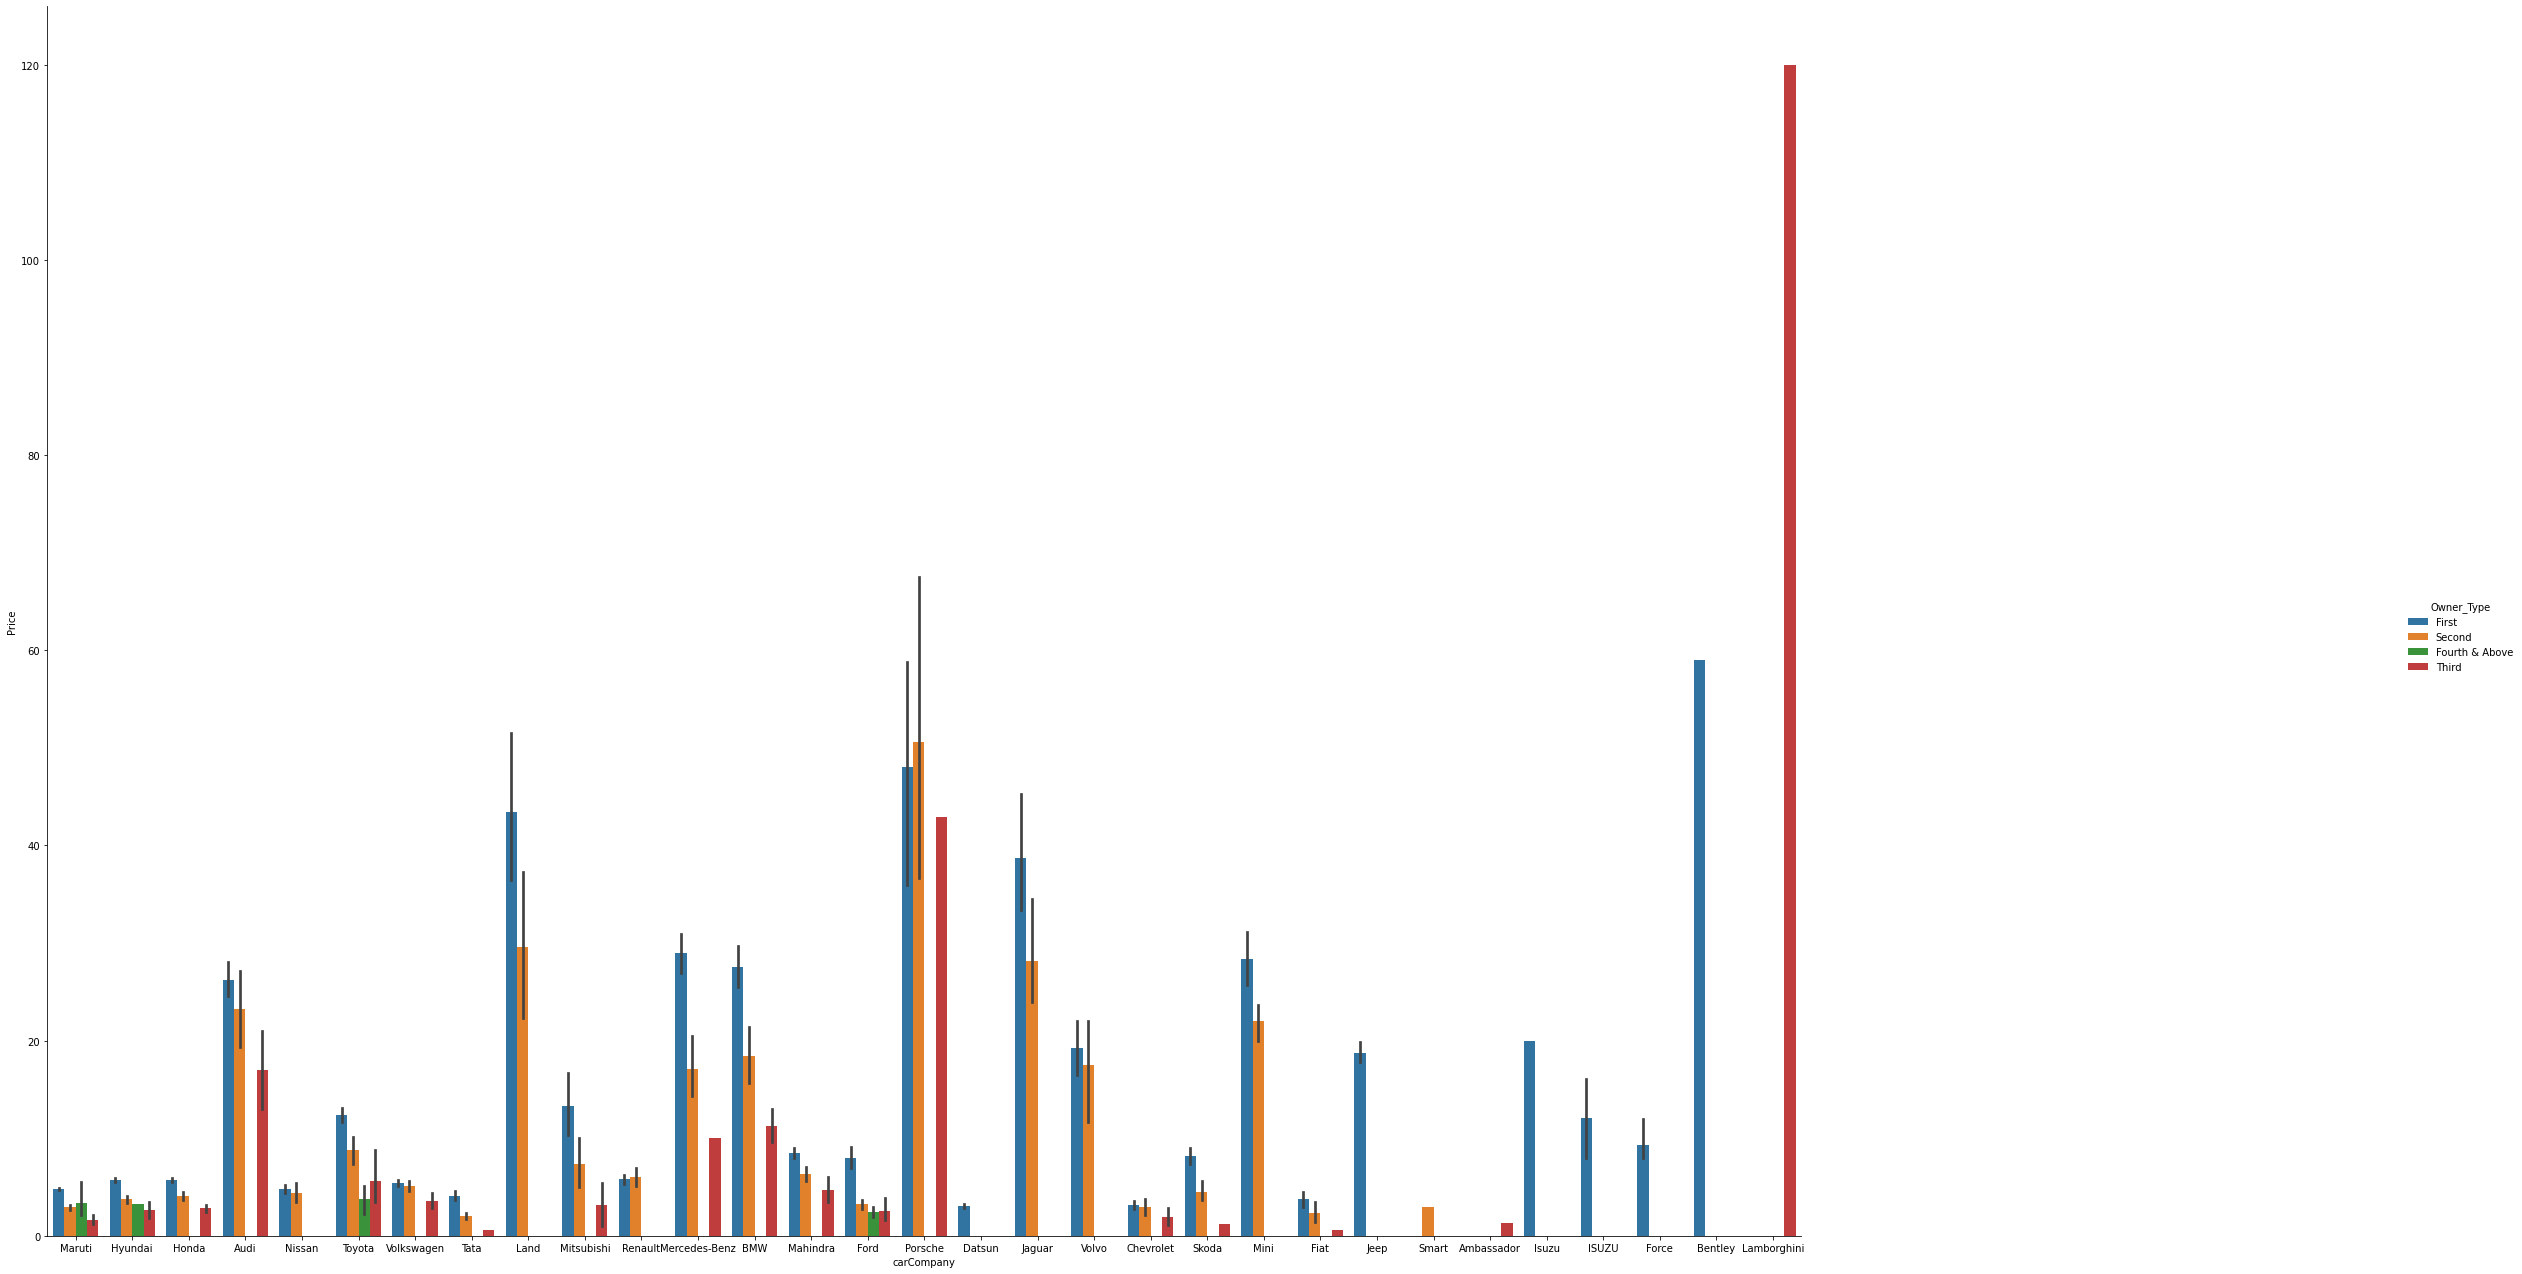

In [53]:
g = sns.catplot(x="carCompany", y="Price", hue="Owner_Type", data=data,kind="bar")
g.fig.set_figwidth(40)
g.fig.set_figheight(20)

# 6. Location wise variation in price of cars belonging to different compnay

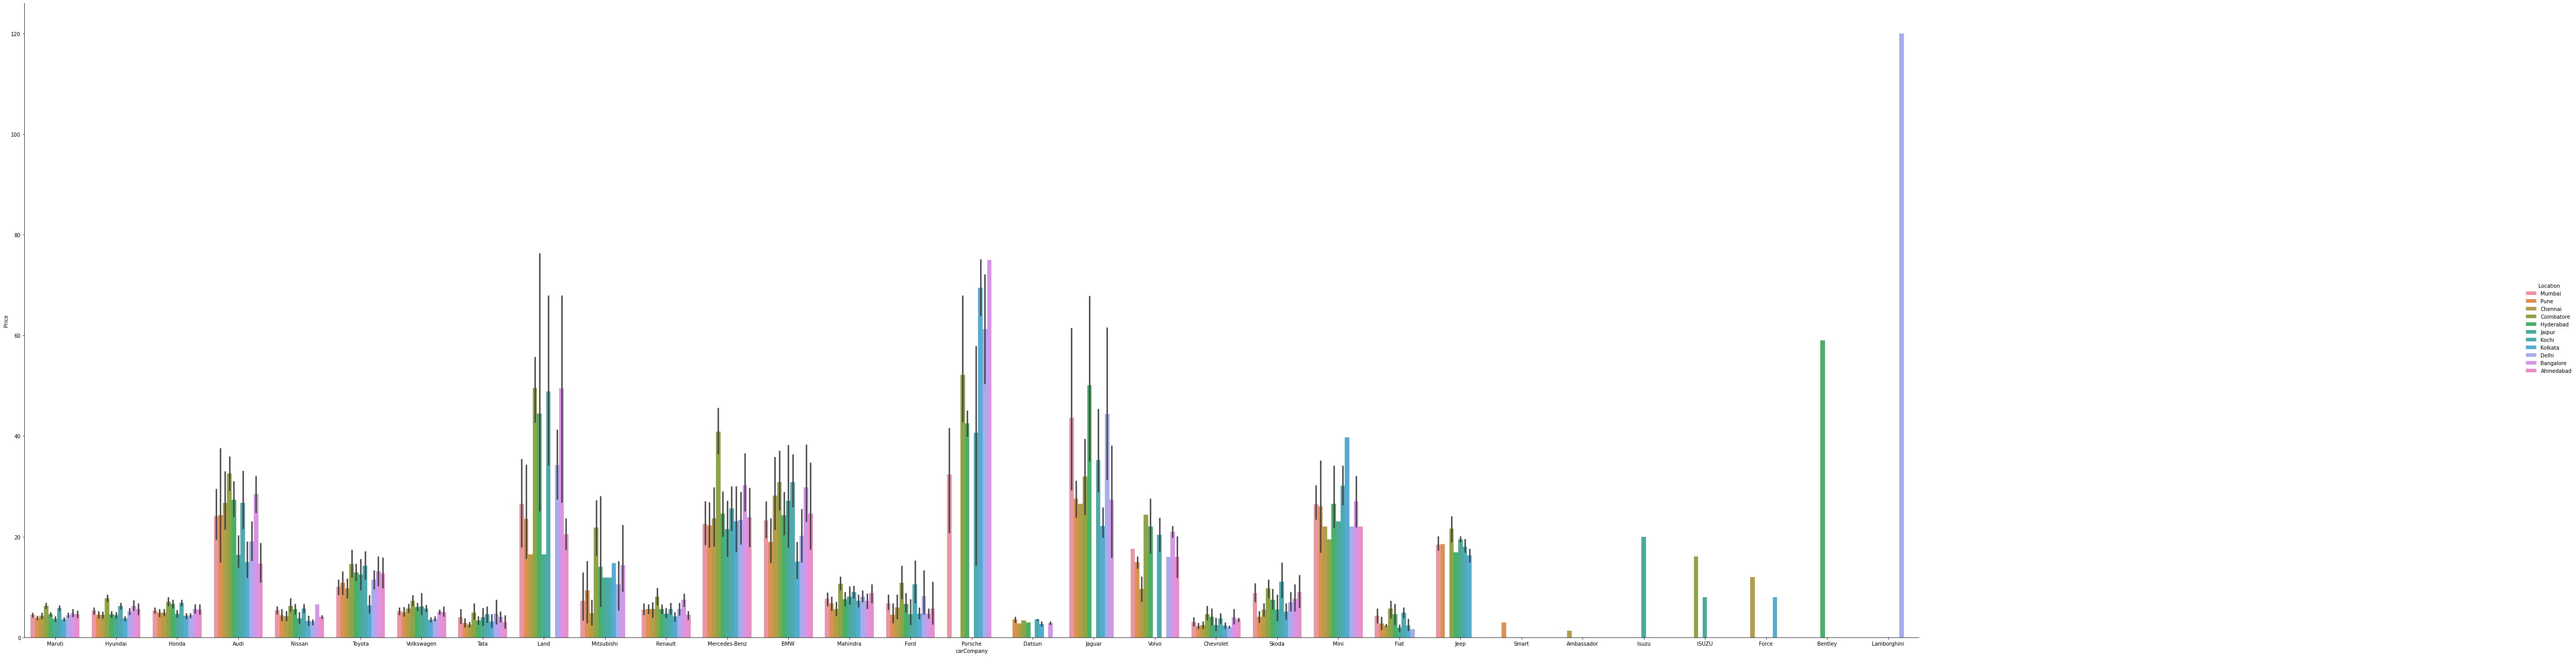

In [54]:
g = sns.catplot(x="carCompany", y="Price", hue="Location", data=data,kind="bar")
g.fig.set_figwidth(80)
g.fig.set_figheight(20)

For maruti maximum price is at: Coimbatore and kochi
For Hyundai maximum price is at: Coimbatore, Kochi and Bangalore
For Honda maximum price is at: Coimbatore, Hyderabad and Kochi
For Audi maximum price is at: Coimbatore, Bangalore
For Nissan maximum price is at: Coimabatore, Bangalore and Kochi
For Toyota maximum price is at: Coimbatore and Kochi

# 7. Company wise distribution of owner_type of cars and thier count

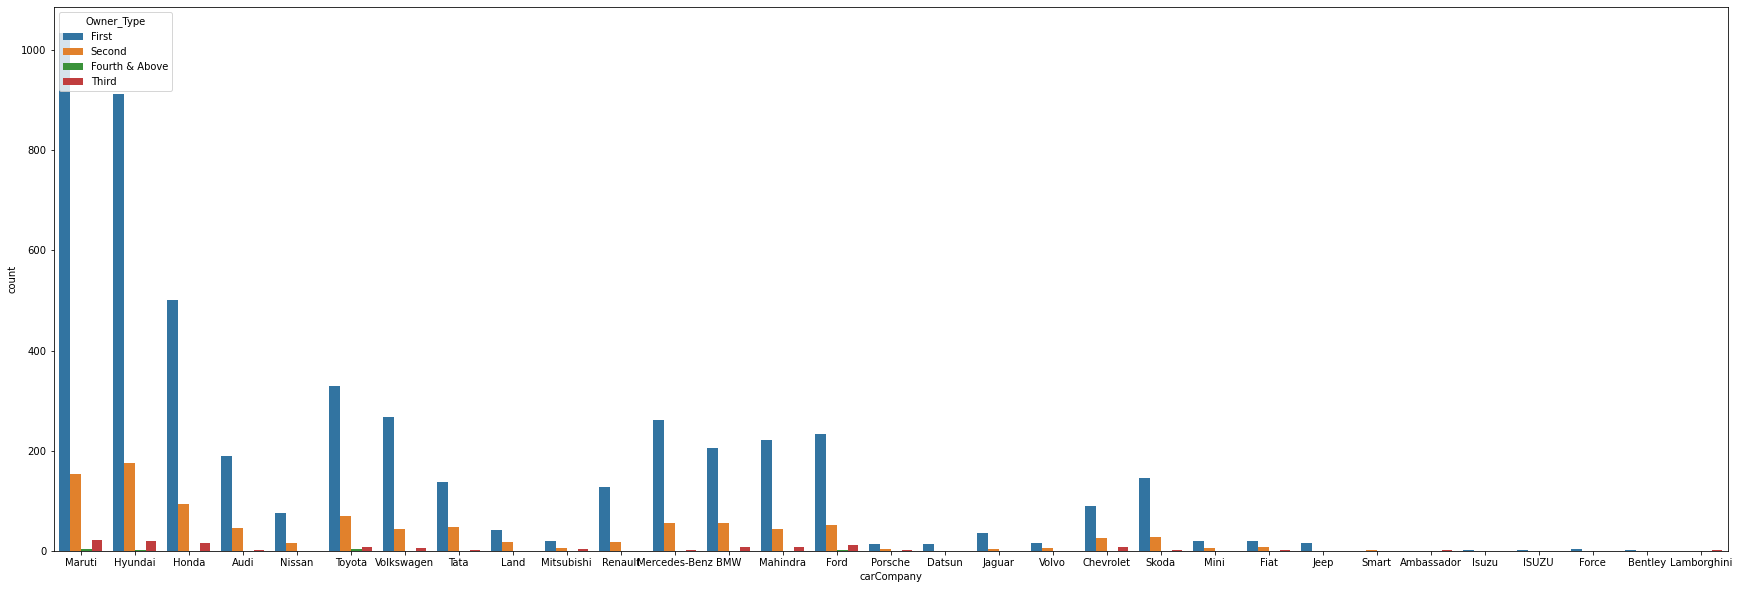

In [55]:
plt.rcParams["figure.figsize"] = [30,10]
g = sns.countplot(x="carCompany", data = data, hue = 'Owner_Type')


# Number of unique values in each column

In [56]:
data.nunique(axis=0)

Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Seats                   9
Price                1373
cleanEngine           146
cleanPower            370
cleanMileage          429
carCompany             31
dtype: int64

In [57]:
from sklearn import preprocessing


<h2>Feature extraction</h2>

In [58]:
data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,cleanEngine,cleanPower,cleanMileage,carCompany
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,998,58.16,26.60,Maruti
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,1582,126.20,19.67,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,1199,88.70,18.20,Honda
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,1248,88.76,20.77,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,1968,140.80,15.20,Audi


In [59]:
y = data['Price']
y=y.to_numpy()


In [60]:
b=pd.get_dummies(data['carCompany'],drop_first=True)
l=pd.get_dummies(data['Location'],drop_first=True)
f=pd.get_dummies(data['Fuel_Type'],drop_first=True)
t=pd.get_dummies(data['Transmission'],drop_first=True)
o=pd.get_dummies(data['Owner_Type'],drop_first=True)
data.drop(['carCompany','Location','Fuel_Type','Owner_Type','Transmission','Price'],axis=1,inplace=True)
data=pd.concat([data,t,b,l,f,o],axis=1)
X=data.iloc[:,:].values




<h2>Applying train-test-split</h2>

In [61]:
#applying train-test-split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.28, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (4333, 54) (4333,)
Test set: (1686, 54) (1686,)


In [62]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train,y_train)
lr

LinearRegression()

In [63]:
print(lr.intercept_)
print(lr.coef_)

-1817.6317450312063
[ 9.04941421e-01 -1.89753823e-05  1.93639997e-01  1.49288485e-03
  8.48359862e-02 -1.05982459e-01  4.28162875e-02  2.48324551e+00
  1.77000429e+00  6.20199312e+00 -6.85097535e+00 -8.03709658e+00
 -6.22851011e+00 -8.47039932e+00 -6.02357076e+00 -6.99733382e+00
 -6.17817033e+00 -8.31761701e+00  2.00284234e-13  8.66012929e+00
 -5.26636235e+00  6.41212067e+01  1.71330345e+01 -8.87124874e+00
 -5.17394331e+00  3.81839409e+00  8.04771099e+00 -5.88183300e+00
 -6.63156526e+00  1.59821068e+01 -6.85104097e+00 -6.68843335e+00
 -3.38932694e+00 -7.38203136e+00 -4.76140366e+00 -6.85835850e+00
 -3.35860466e+00  1.73956741e+00  9.55247679e-01  1.34114113e+00
 -1.06538800e+00  1.48659649e+00  5.27919659e-01 -4.89602984e-01
 -1.64192599e+00 -9.77047928e-01  2.29838486e-01  1.18373367e-01
  1.07282664e+01  9.50538568e-01 -1.10541534e+00  9.99974364e-01
 -7.09494351e-01  9.81366656e-01]


In [64]:
yhat = lr.predict(X_test)
yhat


array([ 8.82232587,  7.17176299,  0.94436903, ...,  9.85116063,
       10.30064229,  9.7185404 ])

In [65]:
from sklearn.metrics import r2_score
r2_score(y_test,yhat)

0.6602507456871065

<h1>Pridicted Price vs Actual Price With Linear Regression Model</h1>

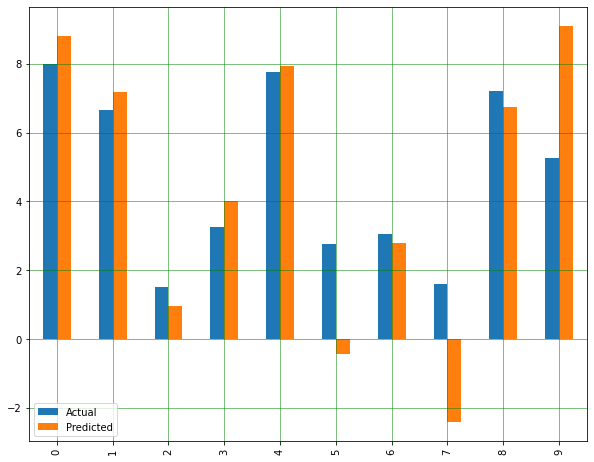

In [66]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': yhat})
df1=df.head(10)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

<h1>Linear Regression Statisticals</h1>

In [67]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, yhat))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, yhat))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, yhat)))
print('Accuracy:',lr.score(X_test,y_test))

Mean Absolute Error: 2.986625348461073
Mean Squared Error: 41.029616137316495
Root Mean Squared Error: 6.405436451742886
Accuracy: 0.6602507456871065


In [68]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': yhat})
df1=df.head(10)
df1

,Actual,Predicted
0,8.00,8.822326
1,6.67,7.171763
2,1.50,0.944369
3,3.25,3.997811
4,7.75,7.931644
5,2.75,-0.427004
6,3.04,2.783382
7,1.59,-2.407397
8,7.20,6.750654
9,5.27,9.091296


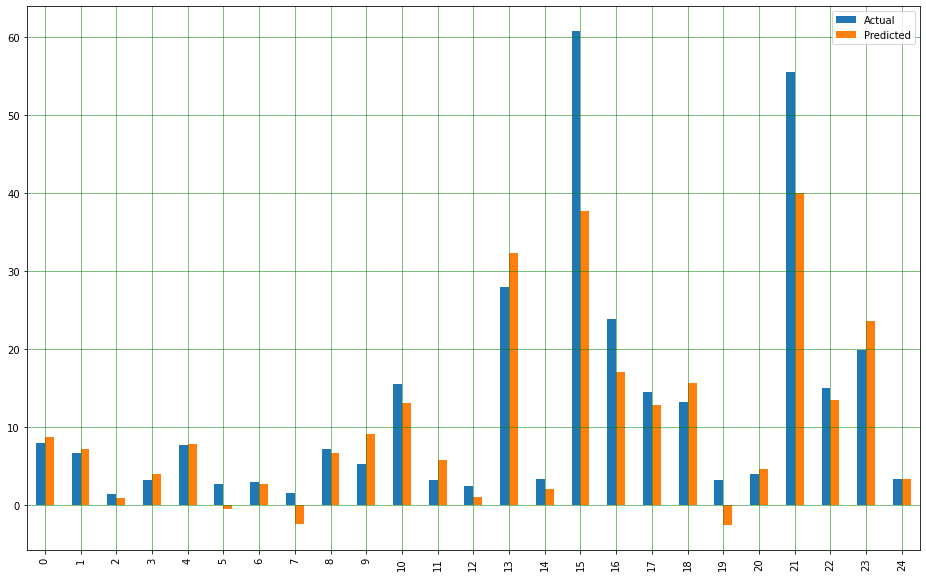

In [69]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [70]:
print (f' Train Score is {lr.score(X_train, y_train)}')

 Train Score is 0.7834258271290557


<h1>Accuracy Before Using XGBoost</h1>

In [71]:
print (f' Train Score is {lr.score(X_train, y_train)}')
print (f' Test Score is {lr.score(X_test, y_test)}')

 Train Score is 0.7834258271290557
 Test Score is 0.6602507456871065


<h1>Accuracy After Using XGBoost</h1>

In [72]:
from xgboost import XGBRegressor
model=XGBRegressor(n_estimators=1000,learning_rate=0.05)
model.fit(X_train,y_train,early_stopping_rounds=5,eval_set=[(X_test,y_test)],verbose=False)
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)

0.9283908848528357

In [73]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1=df.head(10)

In [74]:
df1.head(10)

,Actual,Predicted
0,8.00,8.915669
1,6.67,6.667004
2,1.50,2.066256
3,3.25,4.787928
4,7.75,7.686142
5,2.75,2.483622
6,3.04,3.306697
7,1.59,1.899079
8,7.20,5.827969
9,5.27,6.628943


<h1>Pridicted Price vs Actual Price With XGBoost Model</h1>

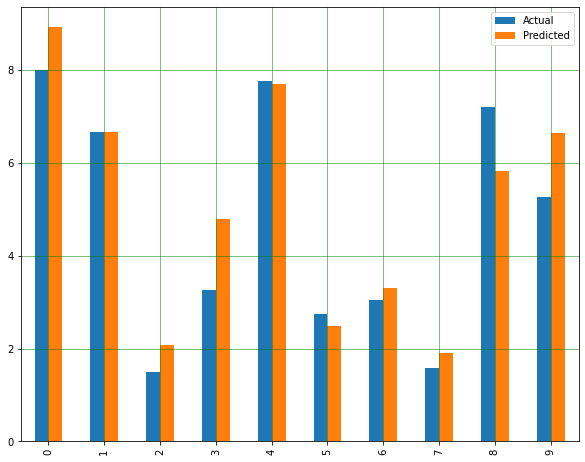

In [75]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()